# Hydrogen Atom Electrons affected by Quantum Walk

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, IBMQ, execute
from qiskit.tools.visualization import plot_histogram
import matplotlib.pyplot as plt
import imageio,os
%matplotlib inline
from numpy import pi

In [2]:
QrC1 = QuantumRegister(1, 'coin1')
QrS1= QuantumRegister(2, 'space1')
Help1=QuantumRegister(1,'help1')
QrC2 = QuantumRegister(1, 'coin2')
QrS2= QuantumRegister(2, 'space2')
Help2=QuantumRegister(1,'help2')

Cr = ClassicalRegister(4)

use H as a coin

{'0000': 538, '1111': 486}


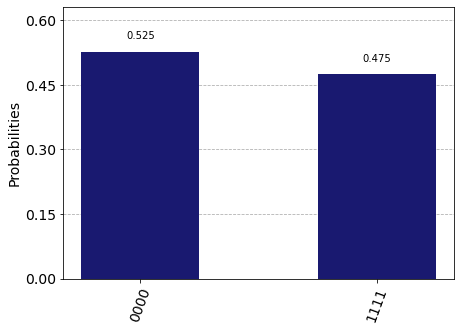

{'0001': 264, '1111': 241, '1110': 259, '0000': 260}


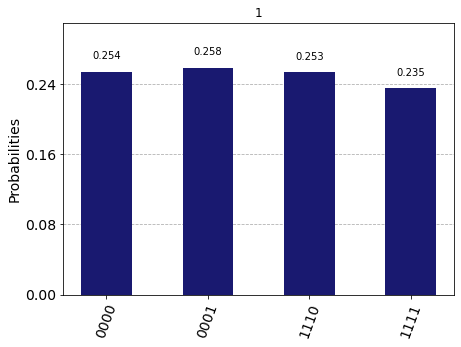

{'1111': 270, '0010': 119, '0001': 119, '0000': 262, '1101': 130, '1110': 124}


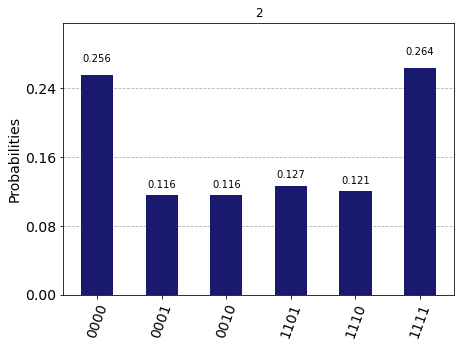

{'0001': 183, '0010': 70, '1100': 47, '1101': 67, '0000': 191, '1111': 218, '1110': 190, '0011': 58}


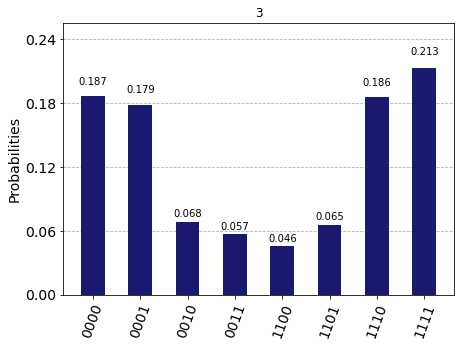

{'0011': 67, '0000': 125, '1101': 204, '0001': 108, '1111': 125, '1110': 127, '0010': 199, '1100': 69}


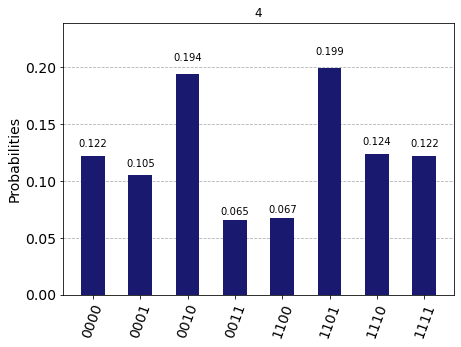

{'0000': 100, '1111': 99, '0010': 114, '1101': 117, '1100': 222, '0001': 84, '1110': 94, '0011': 194}


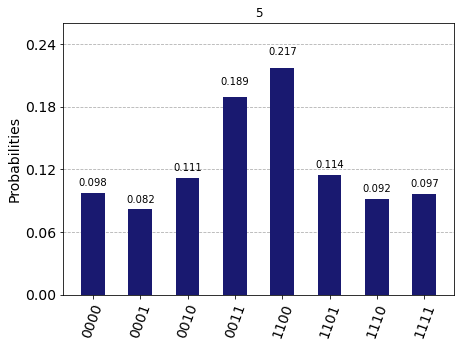

{'1100': 197, '0010': 160, '1101': 146, '0011': 189, '1111': 76, '1110': 80, '0001': 82, '0000': 94}


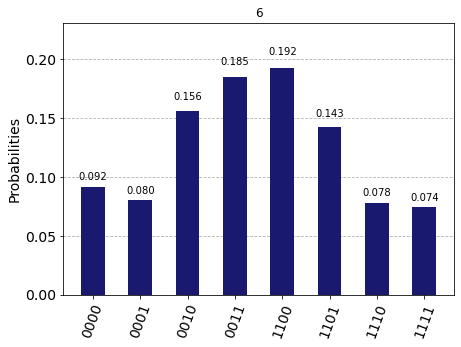

{'1111': 57, '0011': 225, '1100': 227, '1110': 84, '0001': 74, '1101': 159, '0010': 150, '0000': 48}


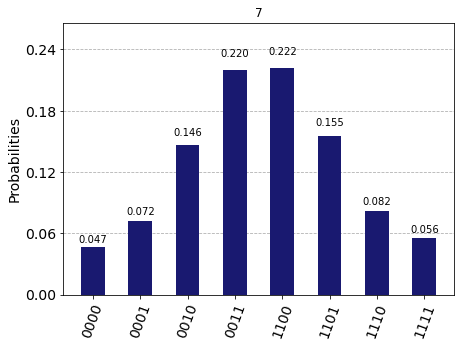

{'1100': 191, '0011': 217, '1110': 92, '0000': 63, '0010': 174, '1111': 45, '1101': 156, '0001': 86}


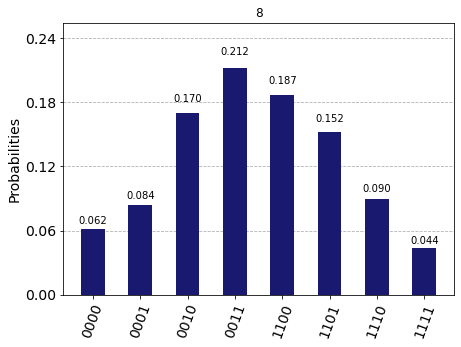

{'1100': 165, '0011': 194, '1101': 155, '0001': 124, '1110': 123, '0010': 144, '0000': 54, '1111': 65}


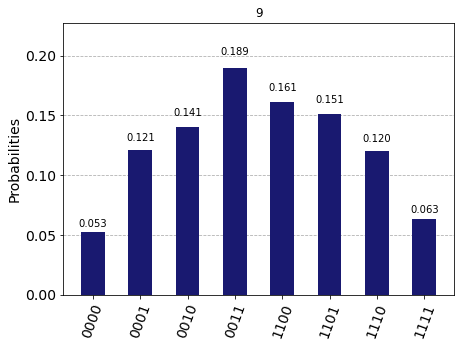

{'0010': 144, '0000': 93, '1100': 185, '1110': 104, '0001': 111, '0011': 145, '1101': 145, '1111': 97}


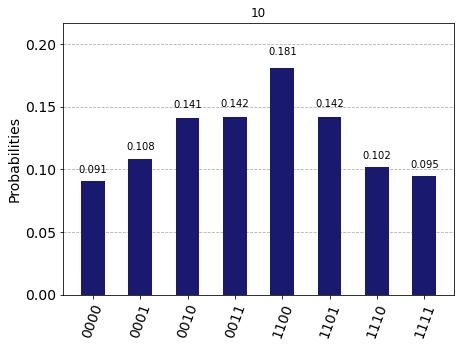

{'0010': 125, '1100': 153, '0001': 140, '1101': 122, '1110': 117, '1111': 113, '0011': 133, '0000': 121}


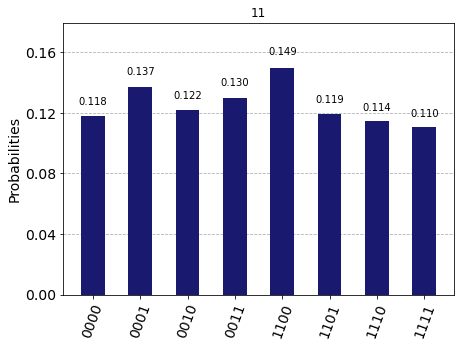

{'1101': 123, '0001': 135, '1111': 138, '1110': 134, '0011': 108, '0000': 142, '0010': 116, '1100': 128}


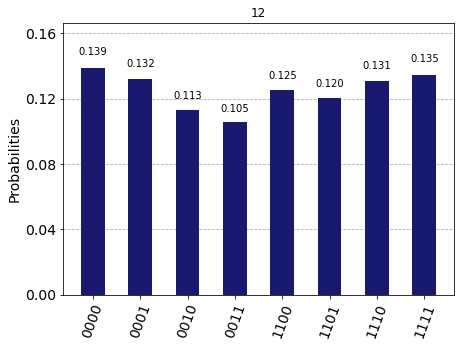

{'0010': 109, '1111': 167, '1101': 101, '0000': 159, '1100': 119, '1110': 131, '0011': 92, '0001': 146}


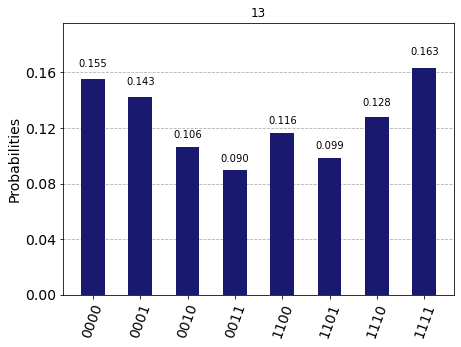

{'0001': 128, '1100': 101, '0010': 101, '0011': 100, '1111': 172, '0000': 161, '1110': 135, '1101': 126}


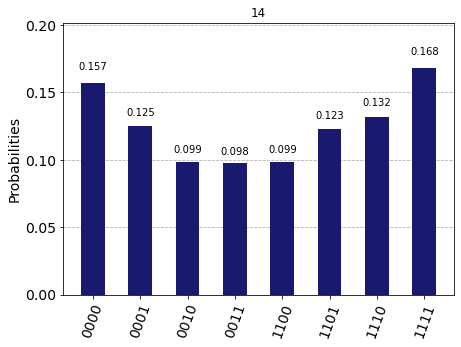

In [7]:
from qiskit.circuit.library.standard_gates import HGate
for a in range(15):

    qc= QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,Cr)
    #Entangle set
    qc.h(1)
    qc.cx(1,2)
    qc.cx(1,5)
    qc.cx(1,6)
    for i in range(a):
        #coin
        qc.barrier()
        qc.h(0)
        qc.barrier()

        #situation 000
        qc.x((0,1,2))
        qc.mcx([0,1,2],3)
        qc.x((0,1,2))
        qc.cx(3,1)
        qc.reset(3)
        qc.barrier()
        #situation 111
        qc.mcx([0,1,2],3)
        qc.cx(3,1)
        qc.reset(3)
        qc.barrier()
        #adder and decreaser(walker)
        qc.ccx(0,1,2)
        qc.cx(0,1)
        qc.x(0)
        qc.cx(0,1)
        qc.ccx(0,1,2)
    qc.measure(1,0)
    qc.measure(2,1)
    qc.measure(5,2)
    qc.measure(6,3)
    from qiskit.visualization import plot_histogram
    %matplotlib inline
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    print(job.result().get_counts())

    display(plot_histogram(job.result().get_counts(), color='midnightblue', title= a 
                    ))

use modify H as  coin

C:\Users\willy\AppData\Local\Temp/ipykernel_3896/1894236456.py:10: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC1[0])


{'0000': 536, '1111': 488}


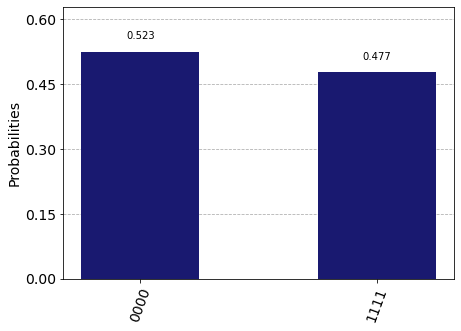

{'1111': 264, '0000': 241, '0001': 255, '1110': 264}


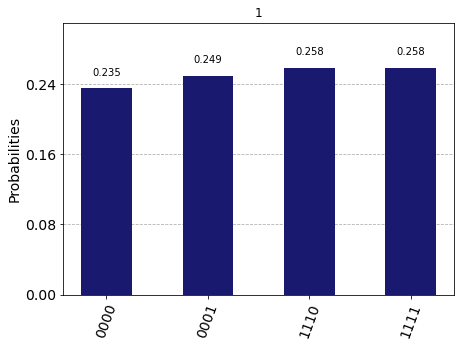

{'1111': 274, '1101': 145, '0010': 150, '0001': 122, '1110': 109, '0000': 224}


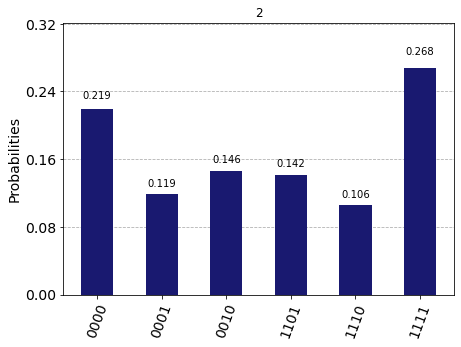

{'1110': 202, '0000': 204, '0010': 61, '1111': 171, '0011': 69, '1100': 58, '0001': 194, '1101': 65}


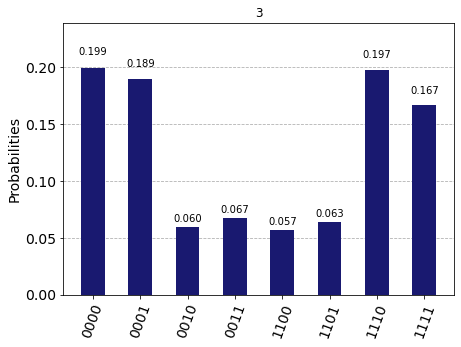

{'1101': 182, '1111': 128, '1110': 141, '0000': 111, '1100': 66, '0011': 63, '0001': 124, '0010': 209}


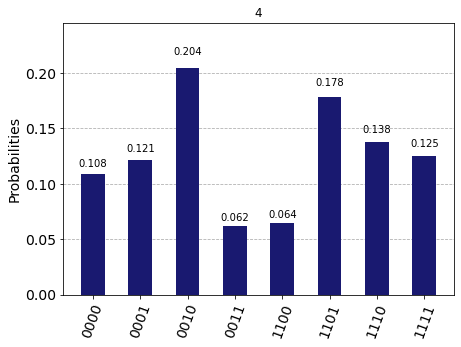

{'1101': 148, '0000': 100, '1100': 181, '0001': 111, '0010': 136, '1110': 94, '1111': 84, '0011': 170}


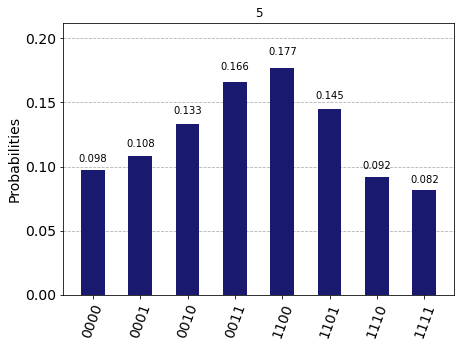

{'1101': 155, '0000': 73, '1110': 79, '0011': 214, '0001': 84, '0010': 139, '1100': 184, '1111': 96}


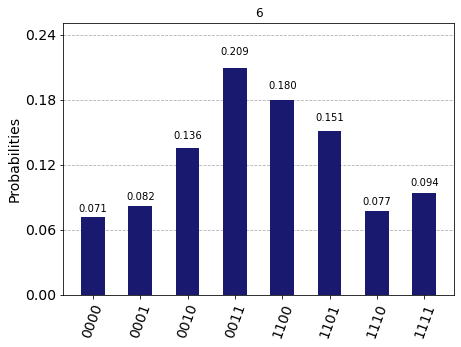

{'1111': 61, '1100': 213, '1101': 141, '0011': 226, '0010': 153, '1110': 86, '0001': 80, '0000': 64}


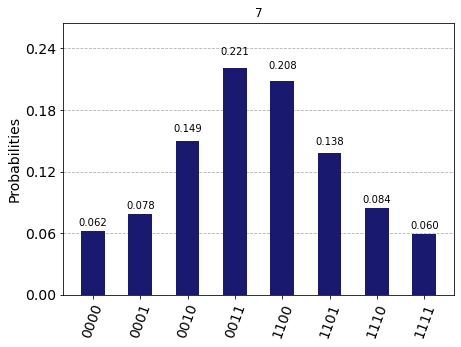

{'0011': 220, '1111': 54, '1101': 175, '0001': 73, '1100': 197, '1110': 86, '0010': 169, '0000': 50}


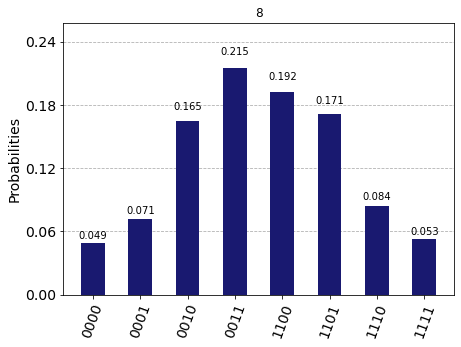

{'0010': 161, '1111': 58, '1101': 158, '0000': 66, '1110': 111, '1100': 184, '0011': 168, '0001': 118}


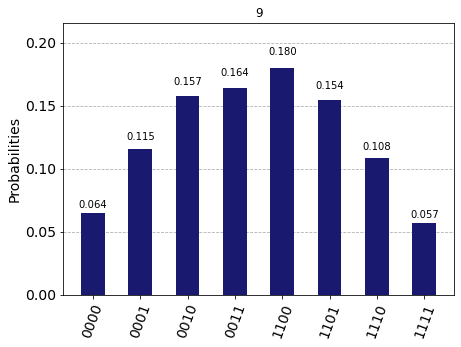

{'1100': 171, '0001': 122, '1110': 130, '0010': 135, '0000': 86, '0011': 160, '1111': 83, '1101': 137}


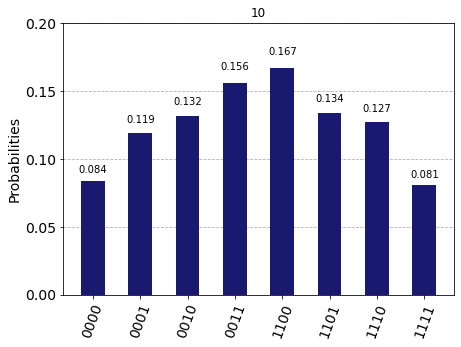

{'1111': 98, '1101': 127, '0001': 120, '1110': 139, '0010': 145, '1100': 131, '0011': 146, '0000': 118}


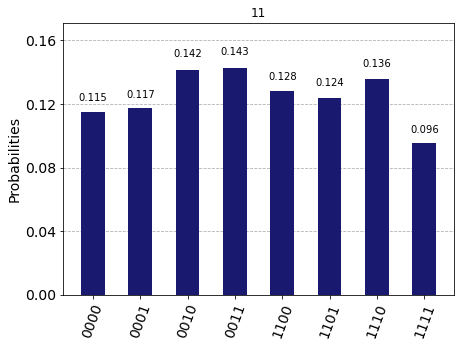

{'0001': 139, '0000': 144, '0011': 119, '1100': 118, '0010': 90, '1111': 143, '1101': 119, '1110': 152}


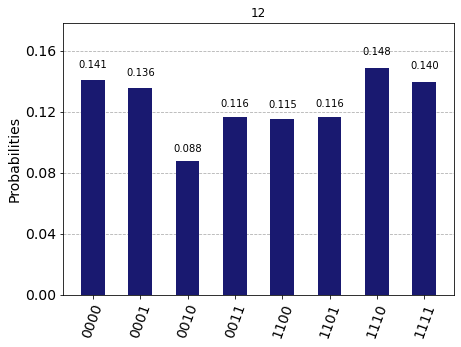

{'0011': 102, '1100': 80, '0000': 191, '1110': 147, '1101': 102, '0001': 150, '0010': 97, '1111': 155}


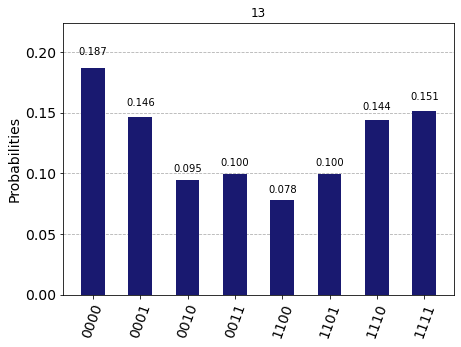

{'0000': 150, '1110': 140, '1100': 104, '0010': 106, '0001': 151, '0011': 94, '1111': 175, '1101': 104}


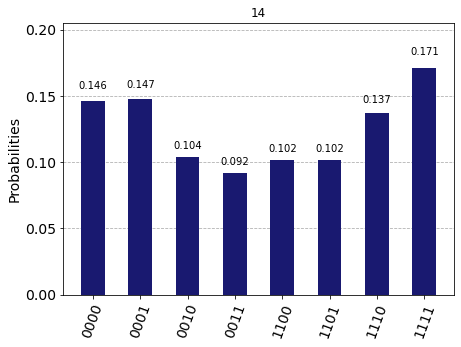

In [8]:
from qiskit.circuit.library.standard_gates import HGate
for a in range(15):

    qc= QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,Cr)
    #Entangle set
    qc.h(1)
    qc.cx(1,2)
    qc.cx(1,5)
    qc.cx(1,6)
    qc.u2(phi=pi/2,lam=3*pi/2,qubit=QrC1[0])
    for i in range(a):
        #coin
        qc.barrier()
        qc.h(0)
        qc.barrier()

        #situation 000
        qc.x((0,1,2))
        qc.mcx([0,1,2],3)
        qc.x((0,1,2))
        qc.cx(3,1)
        qc.reset(3)
        qc.barrier()
        #situation 111
        qc.mcx([0,1,2],3)
        qc.cx(3,1)
        qc.reset(3)
        qc.barrier()
        #adder and decreaser(walker)
        qc.ccx(0,1,2)
        qc.cx(0,1)
        qc.x(0)
        qc.cx(0,1)
        qc.ccx(0,1,2)
    qc.measure(1,0)
    qc.measure(2,1)
    qc.measure(5,2)
    qc.measure(6,3)
    from qiskit.visualization import plot_histogram
    %matplotlib inline
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    print(job.result().get_counts())

    display(plot_histogram(job.result().get_counts(), color='midnightblue', title= a 
                    ))

s gate

In [10]:
from qiskit.circuit.library.standard_gates import SGate,SdgGate
c2s_gate = SGate().control(1)
c3s_gate  = SGate().control(2)

c2sd_gate = SdgGate().control(1)
c3sd_gate  = SdgGate().control(2)

{'0000': 507, '1111': 517}


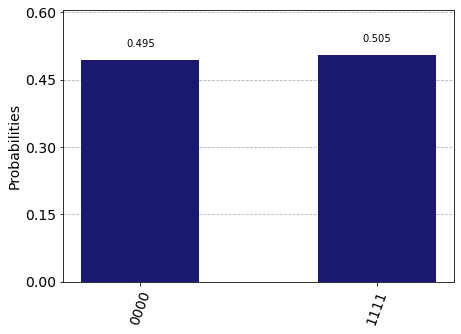

{'1111': 267, '1110': 247, '0000': 266, '0001': 244}


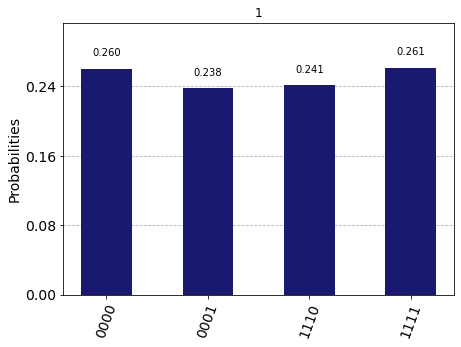

{'1111': 127, '0001': 374, '1110': 391, '0000': 132}


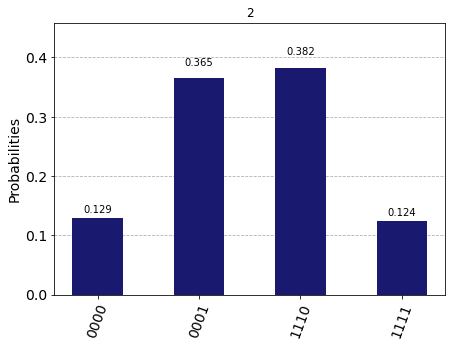

{'1111': 55, '0000': 44, '0001': 480, '1110': 445}


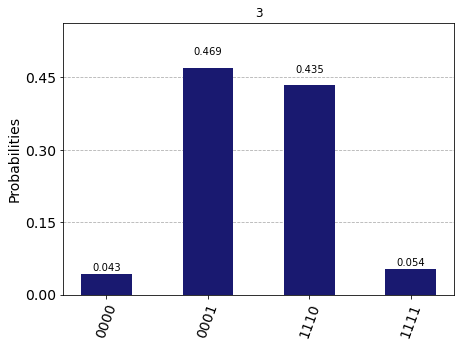

{'0001': 474, '1110': 479, '1111': 33, '0000': 38}


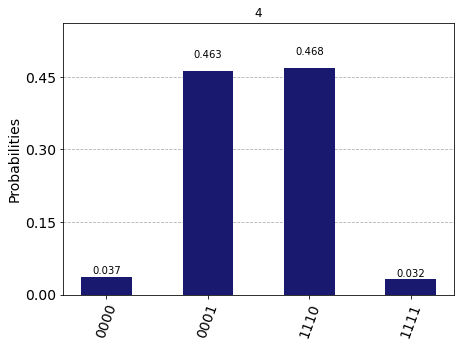

{'1110': 506, '0001': 494, '0000': 14, '1111': 10}


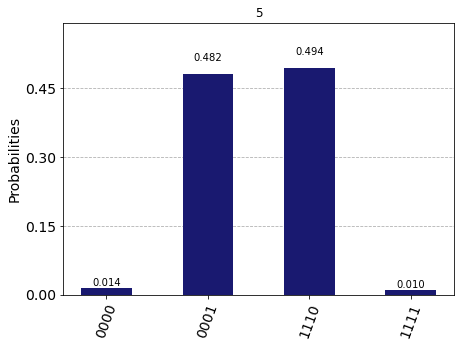

{'0001': 506, '1110': 497, '1111': 9, '0000': 12}


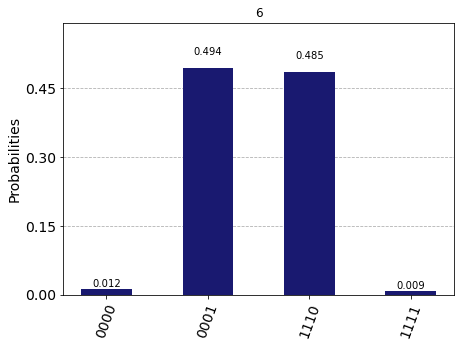

{'0001': 515, '1110': 500, '0000': 5, '1111': 4}


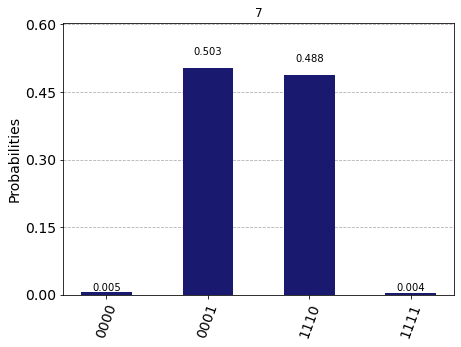

{'1110': 513, '0001': 508, '0000': 1, '1111': 2}


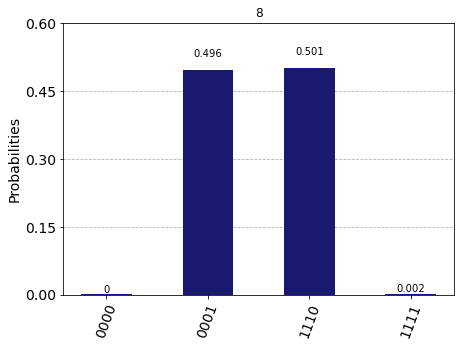

{'0001': 513, '1110': 510, '0000': 1}


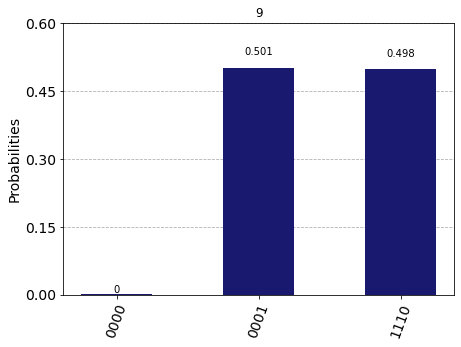

{'1110': 526, '0001': 497, '1111': 1}


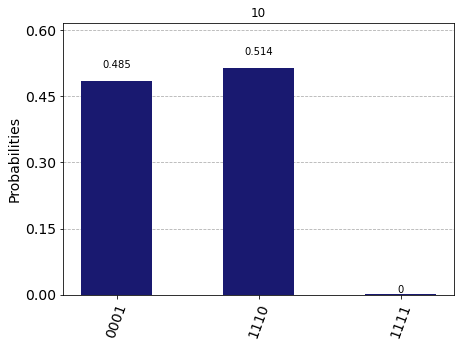

{'0001': 533, '1110': 490, '1111': 1}


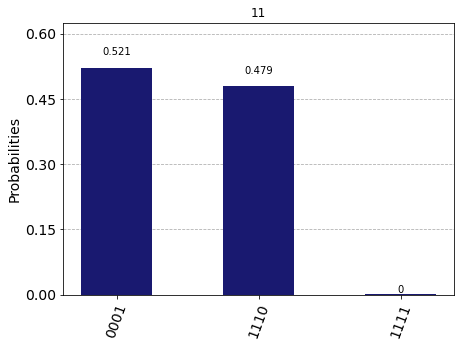

{'1110': 481, '0001': 543}


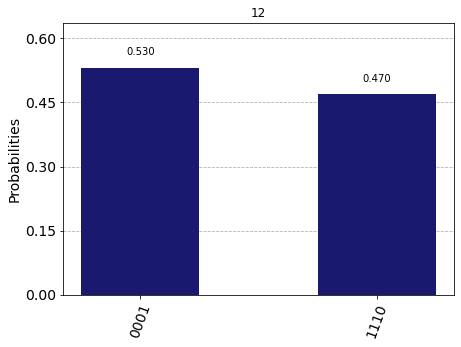

{'1110': 521, '0001': 503}


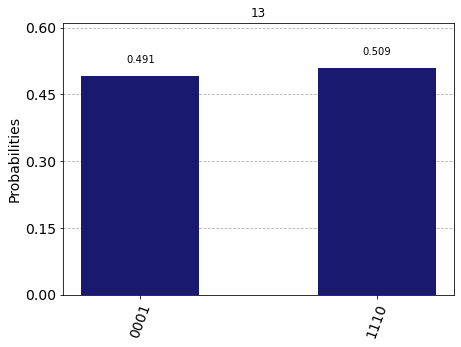

{'0001': 504, '1110': 520}


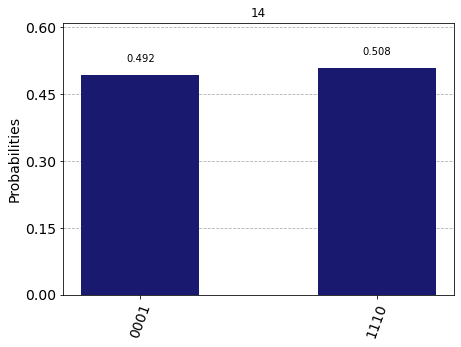

In [11]:
from qiskit.circuit.library.standard_gates import HGate
for a in range(15):

    qc= QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,Cr)
    #Entangle set
    qc.h(1)
    qc.cx(1,2)
    qc.cx(1,5)
    qc.cx(1,6)
    for i in range(a):
        #coin
        qc.barrier()
        qc.h(0)
        qc.barrier()
for a in range(15):

    qc= QuantumCircuit(QrC1,QrS1,Help1,QrC2,QrS2,Help2,Cr)
    #Entangle set
    qc.h(1)
    qc.cx(1,2)
    qc.cx(1,5)
    qc.cx(1,6)
    for i in range(a):
        #coin
        qc.barrier()
        qc.h(0)
        qc.barrier()
        qc.x((0,1,2))
        qc.mcx([0,1,2],3)
        qc.x((0,1,2))
        qc.cx(3,1)
        qc.reset(3)
        qc.barrier()
        qc.mcx([0,1,2],3)
        qc.cx(3,1)
        qc.reset(3)
        qc.barrier()
        qc.append(c3s_gate,[0,1,2])
        qc.append(c2s_gate,[0,1])
        qc.x(0)
        qc.append(c2sd_gate,[0,1])
        qc.append(c3sd_gate,[0,1,2])
    qc.measure(1,0)
    qc.measure(2,1)
    qc.measure(5,2)
    qc.measure(6,3)
    from qiskit.visualization import plot_histogram
    %matplotlib inline
    backend = BasicAer.get_backend('qasm_simulator')
    job = execute(qc, backend)
    print(job.result().get_counts())

    display(plot_histogram(job.result().get_counts(), color='midnightblue', title= a 
                    ))